## ABC applied to position reconstruction

*Bart Pelssers, 26-02-2018, most recent update 20-04-2018*

This notebook provides some ingredients for applying the ABC algorithm to position reconstruction, the most basic case. Just to test the framework.


* Provides:
  * prior mean
  * forward model
  * summary statistic

In [1]:
import numpy as np

In [2]:
from abc_reconstruction.simpleModel import SimpleModel
from abc_reconstruction.utils import PriorPosition, Generator

You don't have ROOT or root_pandas, root truth file output is disabled


In [3]:
# Setup the Models
model = SimpleModel(zoom_multiplier = 2)
prior_mean = PriorPosition()
generator = Generator(model)

In [4]:
# Example pattern from some unknown x,y position
generator()

array([1.66023630e-01, 1.94688456e-01, 1.01401818e-01, 1.65360130e-01,
       1.80959371e-01, 1.98965906e-01, 2.90550912e-01, 3.31132140e-01,
       4.83175083e-01, 5.57517478e-01, 7.99725127e-01, 1.44751904e+00,
       2.29847402e+00, 4.85806948e+00, 8.86930353e+00, 8.33175536e+00,
       5.66355914e+00, 2.95970207e+00, 1.64036337e+00, 9.11756994e-01,
       6.35570696e-01, 4.54212023e-01, 3.72855490e-01, 3.27340466e-01,
       3.17350506e-01, 3.15441578e-01, 2.65184856e-01, 2.53105456e-01,
       2.33934205e-01, 2.20392815e-01, 1.48935335e-01, 1.68455769e-01,
       2.01879408e-01, 1.50054404e-01, 1.84190764e-01, 1.85843403e-01,
       3.04588151e-01, 4.05769483e-01, 4.11044637e-01, 5.35355528e-01,
       5.25804906e-01, 6.88819582e-01, 8.30853726e-01, 9.55290125e-01,
       1.25453079e+00, 2.05340417e+00, 5.15361332e+00, 1.68218841e+01,
       3.94087620e+01, 2.51735755e+01, 7.32323683e+00, 2.71505759e+00,
       1.50279733e+00, 1.05923515e+00, 8.59959310e-01, 7.51400496e-01,
      

In [5]:
# Example pattern from x=24, y=-12

# The range of x and y is [-47.884375 cm, -47.884375 cm]
# But x**2 + y**2 < 47.884375**2
# Otherwise model() will raise and exception

pattern = model(24, -12)

print("Length of pattern: %d, Sum of pattern: %.2f" % (len(pattern), pattern.sum()))
print(pattern)

Length of pattern: 127, Sum of pattern: 500.00
[ 0.18793642  0.21651903  0.22673361  0.29116712  0.31436551  0.34139665
  0.47787565  0.4376744   0.70530862  1.02710466  1.52814229  2.35225266
  3.47081934  3.93317782  3.74522279  2.45160037  1.7220481   1.14250081
  0.77768419  0.58663653  0.37490697  0.35539394  0.26697703  0.29348062
  0.27341068  0.21559755  0.17971024  0.16476303  0.18934091  0.181298
  0.1313543   0.20655253  0.17562329  0.2185811   0.21257346  0.19843043
  0.42545679  0.41170131  0.44307364  0.60027959  0.76098638  0.94056818
  0.98891512  1.32868918  2.26775817  4.62978946  9.17218188 12.79300853
  8.91419385  4.45881458  2.14896411  1.34355701  0.97716992  0.7989524
  0.67218073  0.70057792  0.61829806  0.62287648  0.40531919  0.47344883
  0.42686244  0.46010133  0.49933762  0.4395319   0.45757344  0.40953152
  0.56436196  0.61799416  0.63366518  0.73284476  0.94486058  1.51142451
  2.80133576  9.65937696 42.8680866  72.03385217 21.4050621   4.45652071
  2.067

In [6]:
# If using a 2D Normal prior this would be a good guess for the mean (x,y) of that prior.
prior_mean(pattern)

(19.536776256292445, -13.679798006972462)

# Generate hitpatterns

Update 22-03-2018

Generate hitpatterns from true x,y position to reconstruct with Pax and compare to ABC method

In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
abc_rec = pd.read_csv('ABCreconstructedPos.dat', sep=' ')

In [16]:
abc_rec_zoom = pd.read_csv('ABCreconstructedPos_zoom2.dat', sep=' ')
#abc_rec_zoom = pd.read_csv('DarkMatter_ABCpostmean1000.dat', sep=' ')

In [18]:
print(abc_rec_zoom.shape)
abc_rec_zoom.head()

(1570, 6)


,x_ABC_post_mean,y_ABC_post_mean,x_ABC_post_map,y_ABC_post_map,dist.ABC.mean,dist.ABC.map
1,2.672788,-17.997502,2.683765,-17.977294,0.059109,0.059650
2,10.891222,-6.305192,10.848981,-6.288794,0.017786,0.063088
3,2.671983,37.816519,2.684311,37.839329,0.086407,0.099414
4,-21.223152,-4.425093,-21.279897,-4.424551,0.041177,0.029360
5,-18.114104,-23.216900,-18.137159,-23.240429,0.036085,0.065171


In [26]:
# Read true positions list
filename = 'data/truepos'  # Text file with x_y per row

true_pos = pd.read_csv(filename, header=None, names=['x_true', 'y_true'], sep=' ')

In [27]:
true_pos.head()

,x_true,y_true
0,2.626434,-17.960824
1,10.907536,-6.312277
2,2.726006,37.749081
3,-21.259064,-4.445240
4,-18.078293,-23.212466


In [28]:
true_pos.shape

(6297, 2)

In [11]:
# Add the hitpatterns based on the simple model
def add_pattern(row):
    row['pattern'] = model(row['x_true'], row['y_true'])
    return row

In [12]:
true_pos = true_pos.apply(add_pattern, axis=1)

In [29]:
true_pos.head()

,x_true,y_true
0,2.626434,-17.960824
1,10.907536,-6.312277
2,2.726006,37.749081
3,-21.259064,-4.445240
4,-18.078293,-23.212466


In [14]:
# Store patterns for reconstruction
np.savez('data/simple_lce_model_patterns_zoom2', hitpattern = true_pos['pattern'].values)

In [30]:
# Load reconstructed patterns
#reconstructed = np.load("data/simple_lce_model_patterns_rec.npz")
#reconstructed_zoom = np.load("data/simple_lce_model_patterns_rec_zoom10.npz")
reconstructed_zoom = np.load("data/simple_lce_model_patterns_rec_zoom10_zoom10gen.npz")
reconstructed = np.load("data/simple_lce_model_patterns_zoom2_rec_zoom4_zoom4gen.npz")

In [31]:
true_pos['x_rec'] = reconstructed['x_tpf_qe']
true_pos['y_rec'] = reconstructed['y_tpf_qe']
true_pos['x_rec_nn'] = reconstructed['x_nn_qe']
true_pos['y_rec_nn'] = reconstructed['y_nn_qe']

true_pos['x_rec_zoom'] = reconstructed_zoom['x_tpf_qe']
true_pos['y_rec_zoom'] = reconstructed_zoom['y_tpf_qe']

In [32]:
true_pos['d_tpf'] = np.sqrt((true_pos['x_true'] - true_pos['x_rec'])**2 + (true_pos['y_true'] - true_pos['y_rec'])**2)
true_pos['d_tpf_zoom'] = np.sqrt((true_pos['x_true'] - true_pos['x_rec_zoom'])**2 + (true_pos['y_true'] - true_pos['y_rec_zoom'])**2)
true_pos['d_nn'] = np.sqrt((true_pos['x_true'] - true_pos['x_rec_nn'])**2 + (true_pos['y_true'] - true_pos['y_rec_nn'])**2)

In [33]:
true_pos.head()

,x_true,y_true,x_rec,y_rec,x_rec_nn,y_rec_nn,x_rec_zoom,y_rec_zoom,d_tpf,d_tpf_zoom,d_nn
0,2.626434,-17.960824,2.677409,-17.994681,2.750757,-18.203577,2.613182,-17.943847,0.061194,0.021537,0.272737
1,10.907536,-6.312277,10.896433,-6.288798,11.205810,-6.289808,10.925588,-6.296523,0.025971,0.023959,0.299119
2,2.726006,37.749081,2.677409,37.795056,3.010382,37.672687,2.712731,37.754252,0.066898,0.014246,0.294459
3,-21.259064,-4.445240,-21.232478,-4.420839,-21.026463,-4.142041,-21.278764,-4.454852,0.036086,0.021921,0.382142
4,-18.078293,-23.212466,-18.119212,-23.224969,-17.940467,-22.848985,-18.093172,-23.219985,0.042786,0.016671,0.388734


In [25]:
abc_rec.shape

(2821, 3)

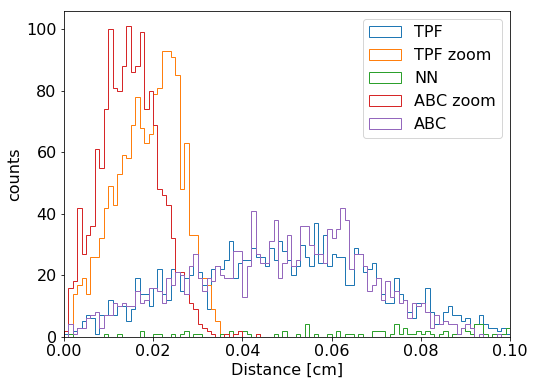

In [34]:
# Check if postions make sense
plt.rcParams['font.size'] = 16
d_range = 0.1
n_ev = 1570
plt.figure(figsize=(8,6))
plt.hist(true_pos['d_tpf'][:n_ev], bins=100, range=(0, d_range), histtype='step', label='TPF')
plt.hist(true_pos['d_tpf_zoom'][:n_ev], bins=100, range=(0, d_range), histtype='step', label='TPF zoom')
plt.hist(true_pos['d_nn'][:n_ev], bins=100, range=(0, d_range), histtype='step', label='NN')
plt.hist(abc_rec['dist.ABC'][:n_ev], bins=100, range=(0, d_range), histtype='step', label='ABC zoom')
plt.hist(abc_rec_zoom['dist.ABC.mean'][:n_ev], bins=100, range=(0, d_range), histtype='step', label='ABC')
#plt.axvline(1/8, color='red', linestyle='--', label='LCE binning')
#plt.axvline(1/16, color='red', linestyle='--', label='LCE binning')
#plt.axvline(1/32, color='red', linestyle='--', label='LCE binning')
#plt.axvline(1/64, color='red', linestyle='--', label='LCE binning')
plt.xlim(0, d_range)
plt.xlabel('Distance [cm]')
plt.ylabel('counts')
plt.legend()
#plt.savefig('d_tpf_abc_zoom.png', dpi=150)
plt.show()

In [46]:
# Save the positions (drop the patterns since these take up a lot of space)
true_pos.drop('pattern', inplace=True, axis=1)

true_pos.to_hdf('data/reconstructed_postions_simple.hdf', key='pos')

In [47]:
# How to load this back into python
data = pd.read_hdf('data/reconstructed_postions_simple.hdf', key='pos')

In [48]:
data.head()

,x_true,y_true,x_rec,y_rec,x_rec_nn,y_rec_nn,x_rec_zoom,y_rec_zoom,d_tpf,d_tpf_zoom,d_nn
0,2.626434,-17.960824,2.520230,-17.881634,2.535508,-18.200328,2.613182,-17.943847,0.132478,0.021537,0.256184
1,10.907536,-6.312277,10.920998,-6.360581,11.275090,-6.346362,10.925588,-6.296523,0.050145,0.023959,0.369130
2,2.726006,37.749081,2.760252,37.803454,3.125084,37.720948,2.712731,37.754252,0.064259,0.014246,0.400069
3,-21.259064,-4.445240,-21.241941,-4.440406,-21.017482,-3.832932,-21.278764,-4.454852,0.017792,0.021921,0.658242
4,-18.078293,-23.212466,-18.121656,-23.162116,-17.869011,-22.379250,-18.093172,-23.219985,0.066449,0.016671,0.859097
